# Part 1 - Processing Text with NLTK

## Load the appropriate libraries

We'll scrape the novel from the website Project Gutenberg using the Python package "requests". Then, we'll extract words from this web data using "BeautifulSoup". Finally, we'll dive into analyzing the distribution of words using the "Natural Language Tookit (NLTK)".

In [ ]:
# NLTK documentation: https://www.nltk.org/

# Load the appropriate libraries
import nltk
import requests
from bs4 import BeautifulSoup  

# Download specific package in the NLTK
nltk.download(['stopwords', 'wordnet'])

## Request the HTML file

To fetch the HTML file with "A Tale of Two Cities", we're going to use the request package to make a GET request for the website, which means we're getting data from it.

In [ ]:
# Get the webpage and pull out all html text

# Get "A Tale of Two Cities" HTML object
r = requests.get("http://www.gutenberg.org/files/98/98-h/98-h.htm")

# Set the correct text encoding of HTML page
r.encoding = "utf-8"

# Extract the HTML from the text object
html = r.text

# Print a selection of characters in the HTML
print(html[0:406])

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN"
"http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd">
<html xmlns="http://www.w3.org/1999/xhtml" xml:lang="en" lang="en">
<head>
<meta http-equiv="Content-Type" content="text/html;charset=utf-8" />
<meta http-equiv="Content-Style-Type" content="text/css" />
<title>The Project Gutenberg EBook of A Tale of Two Cities, by Charles Dickens</title>


## Get text from the HTML

This HTML is not quite what we want. What we need to do now is wrangle this HTML to extract the text of the novel. For this we'll use the package BeautifulSoup. 

In [ ]:
# Extract text from the HTML using BeautifulSoup

# Create a BeautifulSoup object from the HTML
soup = BeautifulSoup(html)

# Get the text out of soup
text = soup.get_text()

# Print out some of the text characters
# print(text[0:500])
print(text[33000:33700])

CHAPTER IV.The Preparation
    
When the mail got successfully to Dover, in the course of the forenoon,
      the head drawer at the Royal George Hotel opened the coach-door as his
      custom was. He did it with some flourish of ceremony, for a mail journey
      from London in winter was an achievement to congratulate an adventurous
      traveller upon.
    

      By that time, there was only one adventurous traveller left be
      congratulated: for the two others had been set down at their respective
      roadside destinations. The mildewy inside of the coach, with its damp and
      dirty straw, its disagreeable smell, and its obscurity, was rather like a
      larger dog


## Tokenize and pre-process the text for Natural Language Processing

### Tokenize the text

We'll now tokenize the text, that is, remove everything that isn't a word (whitespace, punctuations, etc.) and then split the text into a list of words.

In [ ]:
# Tokenization: divide text into smaller parts (tokens)

# Create a tokenizer and define how the tokens should be split
tokenizer = nltk.tokenize.RegexpTokenizer("\w+")

# Tokenize the text
tokens = tokenizer.tokenize(text)

# Print out the first 8 words (tokens)
print(tokens[0:8])

['The', 'Project', 'Gutenberg', 'EBook', 'of', 'A', 'Tale', 'of']


### Make the words lower case

Now, we want to ensure that the same words - whether capitalized or not - are treating as the same word (e.g. tale or Tale).

In [ ]:
# Convert all tokens to lower case

# Create a new list to hold the lowercased words
lower_words = []  

# Loop through all tokens and convert them to lower case
for word in tokens:
  lower_words.append(word.lower())

# Print out the first 8 words (tokens)
print(lower_words[0:8]) 

['the', 'project', 'gutenberg', 'ebook', 'of', 'a', 'tale', 'of']


### Load in stop words (meaningless words)

It's common practice to remove words that appear a lot in the English language such as 'the', 'of', and 'a' because they aren't very interesting. These are known as 'stop words'. The package NLTK includes a good list of stop words in English that we can see.

In [ ]:
# Stop words are already captured in corpus in the NLTK package

# Get the English stop words from NLTK
stop_words = nltk.corpus.stopwords.words("english")

# Print out the first 10 stop words
print(stop_words[0:10]) 

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


### Remove all stop words


In [ ]:
# Create a new list to hold the book text without stop words
filtered_words = []

# Loop through all lowercased words, and only keep non-stop words and append to "filtered_words"
for word in lower_words:
  if word not in stop_words:
    filtered_words.append(word)

# Print the first 5 filtered words to check that stop words have been removed
print(filtered_words[0:5])

['project', 'gutenberg', 'ebook', 'tale', 'two']


## Lexicon Normalization

### Lematization

Return the base or dictionary form of a word (convert synonyms or related words to their "base words")

In [ ]:
from nltk.stem import WordNetLemmatizer

# initialize the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Create a new list to hold the base words
lemmed_words = []

# Loop through the filtered words and break them down to the base words
for word in filtered_words:
  lemmed_words.append(lemmatizer.lemmatize(word))

# Print the first 8 lemmatized_words
print(lemmed_words[0:8])

['project', 'gutenberg', 'ebook', 'tale', 'two', 'city', 'charles', 'dickens']


## Calculate the most frequent words

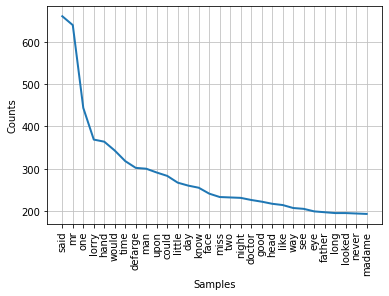

In [ ]:
# Create the word frequency distribution
freqdist = nltk.FreqDist(lemmed_words)

# Plot the Top 30 word frequency distribution
freqdist.plot(30)

# Part 2 - Perform Sentiment Analysis with NLTK/VADER

## Load libraries

In [ ]:
import pandas as pd
import seaborn as sns
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

## Use several samples to see how sentiment scores are generated with SentimentIntensityAnalyzer

In [ ]:
# Initiaze the SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

review = 'This was a good movie.'

# Get the polarity scores of the sentence 'review'
analyzer.polarity_scores(review)

# Compound score: -1 (most extreme negative) to +1 (most extreme positive)

{'compound': 0.4404, 'neg': 0.0, 'neu': 0.508, 'pos': 0.492}

In [ ]:
# Initiaze the SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

review = 'This was a good movie!'

# Get the polarity scores of the sentence 'review'
analyzer.polarity_scores(review)

{'compound': 0.4926, 'neg': 0.0, 'neu': 0.484, 'pos': 0.516}

In [ ]:
# Initiaze the SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

review = 'This was a HORRIBLE movie!'

# Get the polarity scores of the sentence 'review'
analyzer.polarity_scores(review)

{'compound': -0.6731, 'neg': 0.601, 'neu': 0.399, 'pos': 0.0}

## Sentiment analysis for Disney Park reviews

In [ ]:
# Disney Park review data set link
url = 'http://bit.ly/park-reviews'

# Read in the park review data set
df_reviews = pd.read_csv(url)

# Take a look at first 5 rows
df_reviews.head()

,Review_Text,Branch
0,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,"the location is not in the city, took around 1...",Disneyland_HongKong


In [ ]:
df_reviews.shape

(29026, 2)

### Get the sentiment scores for each review

In [ ]:
# Initiaze the SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Create a funtion 'review' using lambda to generate polarity (sentiment) scores
# Create a new column 'Sentiment Scores' to store these sentiment scores
df_reviews['Sentiment Scores'] = df_reviews['Review_Text'].apply(lambda review: analyzer.polarity_scores(review))

# Take a look at first 5 rows
df_reviews.head()

,Review_Text,Branch,Sentiment Scores
0,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,"{'neg': 0.0, 'neu': 0.887, 'pos': 0.113, 'comp..."
1,Its been a while since d last time we visit HK...,Disneyland_HongKong,"{'neg': 0.04, 'neu': 0.73, 'pos': 0.231, 'comp..."
2,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,"{'neg': 0.024, 'neu': 0.742, 'pos': 0.235, 'co..."
3,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,"{'neg': 0.08, 'neu': 0.76, 'pos': 0.16, 'compo..."
4,"the location is not in the city, took around 1...",Disneyland_HongKong,"{'neg': 0.0, 'neu': 0.899, 'pos': 0.101, 'comp..."


### Extract the "compound score" from the sentiment scores for each review

In [ ]:
# Create a funtion 'score_dict' using lambda to extract the 'compound score' from the sentiment scores dictionary
# Create a new column 'Compound Score' to store compound scores
df_reviews['Compound Score'] = df_reviews['Sentiment Scores'].apply(lambda score_dict: score_dict['compound'])

# Take a look at first 5 rows
df_reviews.head()

,Review_Text,Branch,Sentiment Scores,Compound Score
0,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,"{'neg': 0.0, 'neu': 0.887, 'pos': 0.113, 'comp...",0.7069
1,Its been a while since d last time we visit HK...,Disneyland_HongKong,"{'neg': 0.04, 'neu': 0.73, 'pos': 0.231, 'comp...",0.9901
2,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,"{'neg': 0.024, 'neu': 0.742, 'pos': 0.235, 'co...",0.9920
3,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,"{'neg': 0.08, 'neu': 0.76, 'pos': 0.16, 'compo...",0.8489
4,"the location is not in the city, took around 1...",Disneyland_HongKong,"{'neg': 0.0, 'neu': 0.899, 'pos': 0.101, 'comp...",0.2846


### Categorize compound scores into 'Positive' and 'Negative' categories for analysis

In [ ]:
# Create a funtion 'c' using lambda to categorize compound scores
# Create a new column 'Sentiment Category' to store score category
df_reviews['Sentiment Category'] = df_reviews['Compound Score'].apply(lambda c: 'Positive' if c >= 0 else 'Negative')

# Take a look at first 5 rows
df_reviews.head()

,Review_Text,Branch,Sentiment Scores,Compound Score,Sentiment Category
0,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,"{'neg': 0.0, 'neu': 0.887, 'pos': 0.113, 'comp...",0.7069,Positive
1,Its been a while since d last time we visit HK...,Disneyland_HongKong,"{'neg': 0.04, 'neu': 0.73, 'pos': 0.231, 'comp...",0.9901,Positive
2,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,"{'neg': 0.024, 'neu': 0.742, 'pos': 0.235, 'co...",0.9920,Positive
3,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,"{'neg': 0.08, 'neu': 0.76, 'pos': 0.16, 'compo...",0.8489,Positive
4,"the location is not in the city, took around 1...",Disneyland_HongKong,"{'neg': 0.0, 'neu': 0.899, 'pos': 0.101, 'comp...",0.2846,Positive


### Understand overall sentiment with distribution of Compound Score

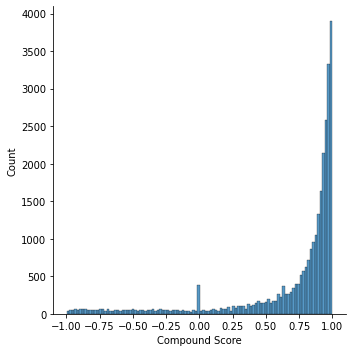

In [ ]:
# Plot distribution of Compound Score to see overall sentiment
sns.displot(data=df_reviews, x="Compound Score");
# The reviews lean to positive 